In [59]:
#Importing librairies

#Data Transformation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Opening the data

In [60]:
#Link to the dataset
url="https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/airline_2m.tar.gz"

#Generate a DataFrame form a tar.gz file
df = pd.read_csv(url, compression='gzip', encoding='ISO-8859-1', parse_dates=['FlightDate'], dtype={'Div1Airport': str, 'Div1TailNum': str, 'Div2Airport': str, 'Div2TailNum': str})

#Correcting the name of the first column
df.rename(columns={'airline_2m.csv': 'Year'}, inplace=True)

#Show the 5 first lines of the dataset
df.head(5)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998.0,1.0,1.0,2.0,5.0,1998-01-02,NW,19386.0,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,2.0,5.0,28.0,4.0,2009-05-28,FL,20437.0,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013.0,2.0,6.0,29.0,6.0,2013-06-29,MQ,20398.0,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.0,3.0,8.0,31.0,2.0,2010-08-31,DL,19790.0,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006.0,1.0,1.0,15.0,7.0,2006-01-15,US,20355.0,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.tail()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
1999996,1999.0,1.0,1.0,5.0,2.0,1999-01-05,CO,19704.0,CO,N14308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999997,2003.0,4.0,11.0,14.0,5.0,2003-11-14,US,20355.0,US,N528AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999998,2012.0,2.0,5.0,15.0,2.0,2012-05-15,WN,19393.0,WN,N281WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999999,2003.0,2.0,4.0,29.0,2.0,2003-04-29,UA,19977.0,UA,N364UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000000,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#First look into the dataset
print("Shape:", df.shape, "\n"
      "Duplicated:", df.duplicated().sum(), "\n"
      "Null:", (df.isnull().sum(axis=1) == df.shape[1]).sum())

Shape: (2000001, 109) 
Duplicated: 0 
Null: 1


In [63]:
#Eliminate rows where all the values are missing
df.dropna(how='all', inplace=True)

#Eliminate Duplicates
df.drop_duplicates(inplace=True)

#Control the shape of the DataFrame
print("Shape:", df.shape)

Shape: (2000000, 109)


In [64]:
#Generate a dataframe with the proportion of missing value in each column
col_control = round((df.isnull().sum() / len(df) * 100), 2).sort_values(ascending=False)

#Print the 10 campaigns with most missing values
print("Columns with missing values:", col_control.head(10), "\n")

#List of the column with more than 100% null inside
col_to_del = col_control[col_control >= 100].index
print("Colums to delete:\n", col_to_del, "\n")

#Eliminate the columns
df.dropna(axis=1, how='all', inplace=True)

#Control the new shape of the DataFrame
print("New shape:", df.shape)

Columns with missing values: Div5TailNum         100.0
Div4AirportID       100.0
Div3TailNum         100.0
Div3WheelsOff       100.0
Div3LongestGTime    100.0
Div3TotalGTime      100.0
Div3WheelsOn        100.0
Div3AirportSeqID    100.0
Div3AirportID       100.0
Div2AirportID       100.0
dtype: float64 

Colums to delete:
 Index(['Div5TailNum', 'Div4AirportID', 'Div3TailNum', 'Div3WheelsOff',
       'Div3LongestGTime', 'Div3TotalGTime', 'Div3WheelsOn',
       'Div3AirportSeqID', 'Div3AirportID', 'Div2AirportID', 'Div3Airport',
       'Div2TailNum', 'Div2WheelsOff', 'Div2LongestGTime', 'Div2TotalGTime',
       'Div2WheelsOn', 'Div2AirportSeqID', 'Div4Airport', 'Div2Airport',
       'Div5WheelsOff', 'Div4TailNum', 'Div5LongestGTime', 'Div4AirportSeqID',
       'Div4WheelsOn', 'Div4TotalGTime', 'Div5TotalGTime', 'Div5WheelsOn',
       'Div5AirportSeqID', 'Div4LongestGTime', 'Div4WheelsOff',
       'Div5AirportID', 'Div5Airport'],
      dtype='object') 

New shape: (2000000, 85)


## Analyze the data

Date min: 1987-10-01 00:00:00 
Date max: 2020-03-31 00:00:00


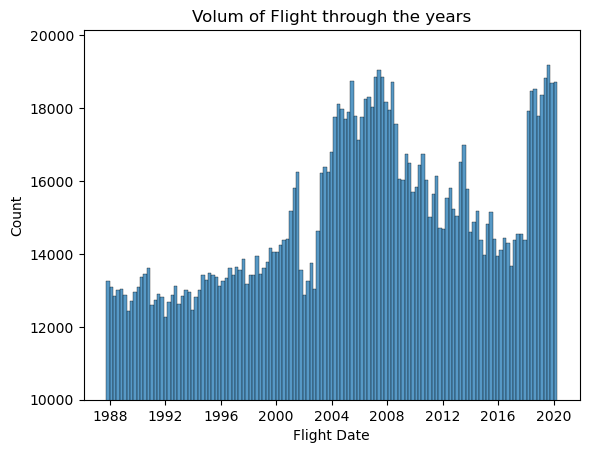

In [100]:
#Min and Max date of the data
print("Date min:", df['FlightDate'].min(), "\n"
      "Date max:", df['FlightDate'].max())

#Plotting histogram
sns.histplot(df, x='FlightDate')
plt.xlabel('Flight Date')
plt.ylabel('Count')
plt.title('Volum of Flight through the years')

# Set y-axis lower limit to 100k
plt.ylim(10000, plt.ylim()[1])

plt.show()

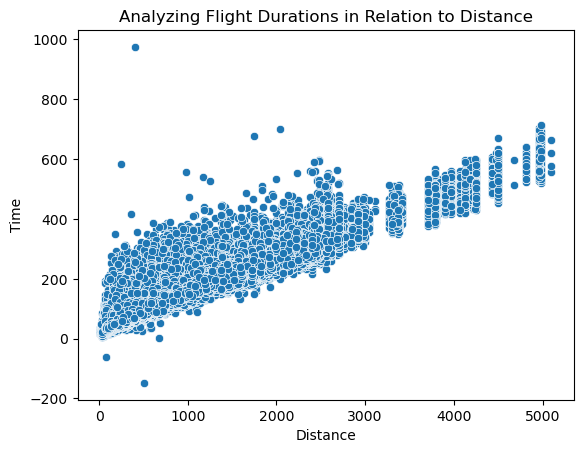

In [151]:
#Relation between time in the air distance covered
sns.scatterplot(data=df, x='Distance', y='ActualElapsedTime')
plt.title('Analyzing Flight Durations in Relation to Distance')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.show()

Proportion of flights delayed: 
 0.0    0.830364
1.0    0.169636
Name: DepDel15, dtype: float64


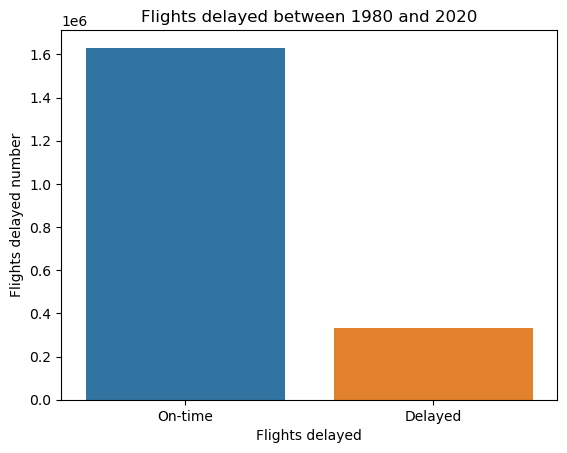

In [92]:
#Proportion of flight delayed
print("Proportion of flights delayed:", "\n", df['DepDel15'].value_counts(normalize=True))

#Plotting chart
sns.countplot(data=df, x='DepDel15')
plt.xlabel('Flights delayed')
plt.xticks([0, 1], ['On-time', 'Delayed'])
plt.ylabel('Flights delayed number')
plt.title('Flights delayed between 1980 and 2020')
plt.show()

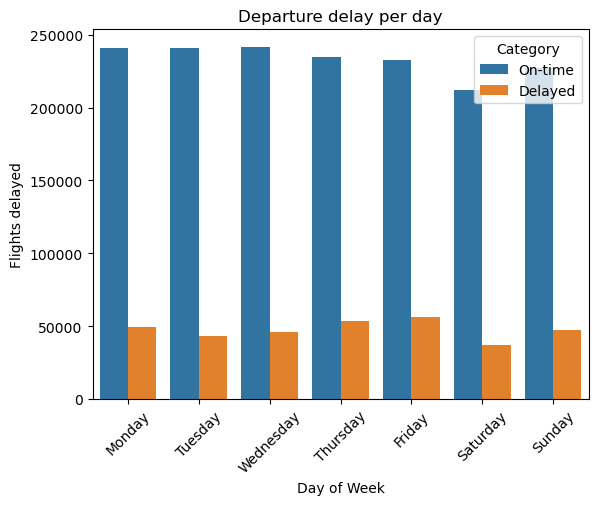

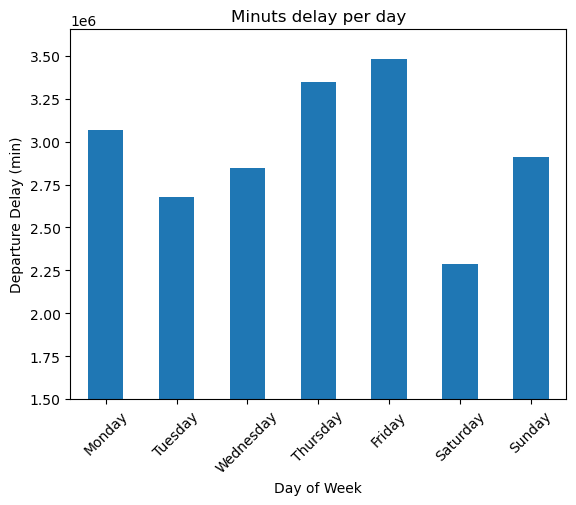

In [138]:
#Graph 1
#Proportion of flights delayed in the week
sns.countplot(x='DayOfWeek', hue='DepDel15', data=df)
#X parameters
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
#Y parameters
plt.ylabel('Flights delayed')
#Legend
plt.legend(['On-time', 'Delayed'], title='Category')
#Title
plt.title('Departure delay per day')
plt.show()

#-----------------------------------------------------

#Graph2
#Flights delayed in per day in minutes
df.groupby('DayOfWeek')['DepDelayMinutes'].sum().plot(kind='bar')

#X parameters
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

#Y parameters
plt.ylabel('Departure Delay (min)')
plt.ylim(1500000, plt.ylim()[1])

#Title
plt.title('Minuts delay per day')

plt.show()

In [127]:
#Graph 1
#Proportion of flights delayed in the week
sns.countplot(x='DayOfWeek', hue='DepDel15', data=df)
#X parameters
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
#Y parameters
plt.ylabel('Flights delayed')
#Legend
plt.legend(['On-time', 'Delayed'], title='Category')
#Title
plt.title('Departure delay per day')
plt.show()

DayOfWeek
1.0    3065633.0
2.0    2675927.0
3.0    2847471.0
4.0    3347504.0
5.0    3480133.0
6.0    2285189.0
7.0    2912883.0
Name: DepDelayMinutes, dtype: float64

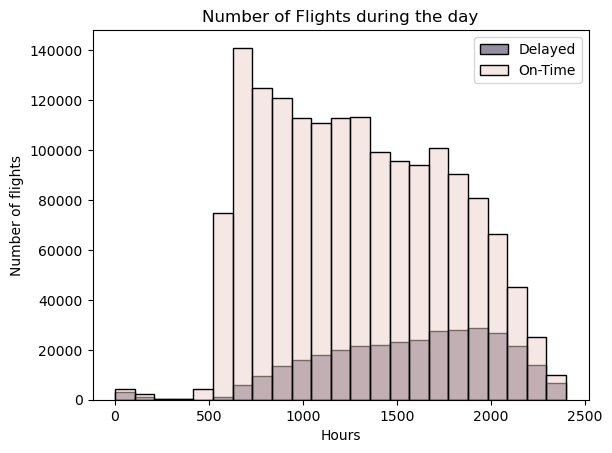

In [150]:
sns.histplot(data=df, x='DepTime', bins=23, hue='DepDel15')
plt.xlabel('Hours')
plt.ylabel('Number of flights')
plt.legend(['Delayed', 'On-Time'])
plt.title('Number of Flights during the day')
plt.show()